## Task 2: Credit / Home Loans - AutoML vs Bespoke ML

Standard Bank is embracing the digital transformation wave and intends to use new and exciting technologies to give their customers a complete set of services from the convenience of their mobile devices.
As Africa’s biggest lender by assets, the bank aims to improve the current process in which potential borrowers apply for a home loan. The current process involves loan officers having to manually process home loan applications. This process takes 2 to 3 days to process upon which the applicant will receive communication on whether or not they have been granted the loan for the requested amount.
To improve the process Standard Bank wants to make use of machine learning to assess the credit worthiness of an applicant by implementing a model that will predict if the potential borrower will default on his/her loan or not, and do this such that the applicant receives a response immediately after completing their application. 

You will be required to follow the data science lifecycle to fulfill the objective. The data science lifecycle (https://www.datascience-pm.com/crisp-dm-2/) includes:

- Business Understanding
- Data Understanding
- Data Preparation
- Modelling
- Evaluation
- Deployment.

You now know the CRoss Industry Standard Process for Data Mining (CRISP-DM), have an idea of the business needs and objectivess, and understand the data. Next is the tedious task of preparing the data for modeling, modeling and evaluating the model. Luckily, just like EDA the first of the two phases can be automated. But also, just like EDA this is not always best. 


In this task you will be get a taste of AutoML and Bespoke ML. In the notebook we make use of the library auto-sklearn/autosklearn (https://www.automl.org/automl/auto-sklearn/) for AutoML and sklearn for ML. We will use train one machine for the traditional approach and you will be required to change this model to any of the models that exist in sklearn. The model we will train will be a Logistic Regression. Parts of the data preparation will be omitted for you to do, but we will provide hints to lead you in the right direction.

The data provided can be found in the Resources folder as well as (https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset).

- train will serve as the historical dataset that the model will be trained on and,
- test will serve as unseen data we will predict on, i.e. new ('future') applicants.

### Part One

There are many AutoEDA Python libraries out there which include:

- dtale (https://dtale.readthedocs.io/en/latest/)
- pandas profiling (https://pandas-profiling.ydata.ai/docs/master/index.html)
- autoviz (https://readthedocs.org/projects/autoviz/)
- sweetviz (https://pypi.org/project/sweetviz/)

and many more. In this task we will use Sweetviz.. You may be required to use bespoke EDA methods.

The Home Loans Department manager wants to know the following:

1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

3. How do the the loan statuses compare? i.e. what is the distrubition of each?

4. How many of the loan applicants have dependents based on the historical dataset?

5. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset? 

6. Are applicants with a credit history more likely to default than those who do not have one?

7. Is there a correlation between the applicant's income and the loan amount they applied for? 

### Part Two

Run the AutoML section and then fill in code for the traditional ML section for the the omitted cells.

Please note that the notebook you submit must include the analysis you did in Task 2.



## Import Libraries




In [2]:
# !pip install sweetviz 
# # uncomment the above if you need to install the library 
# !pip install auto-sklearn
# # uncomment the above if you need to install the library 

In [4]:
# !pip install --upgrade scipy

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz 
# import autosklearn.classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

## Import Datasets

In [8]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Part One: Explore Dataset

### Sweetviz

                                             |      | [  0%]   00:00 -> (? left)


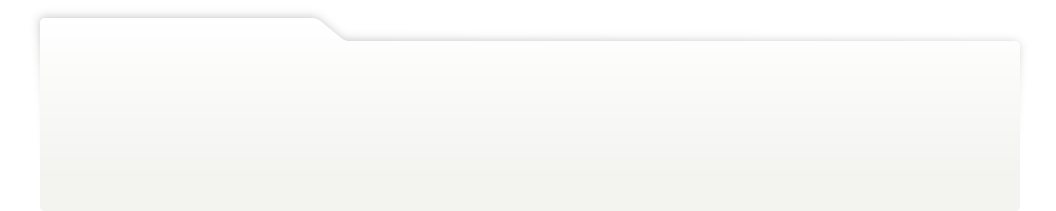
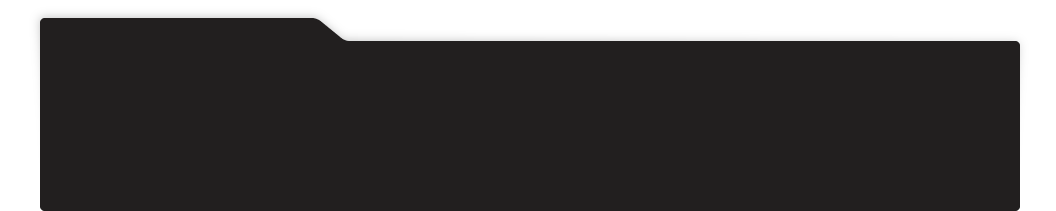
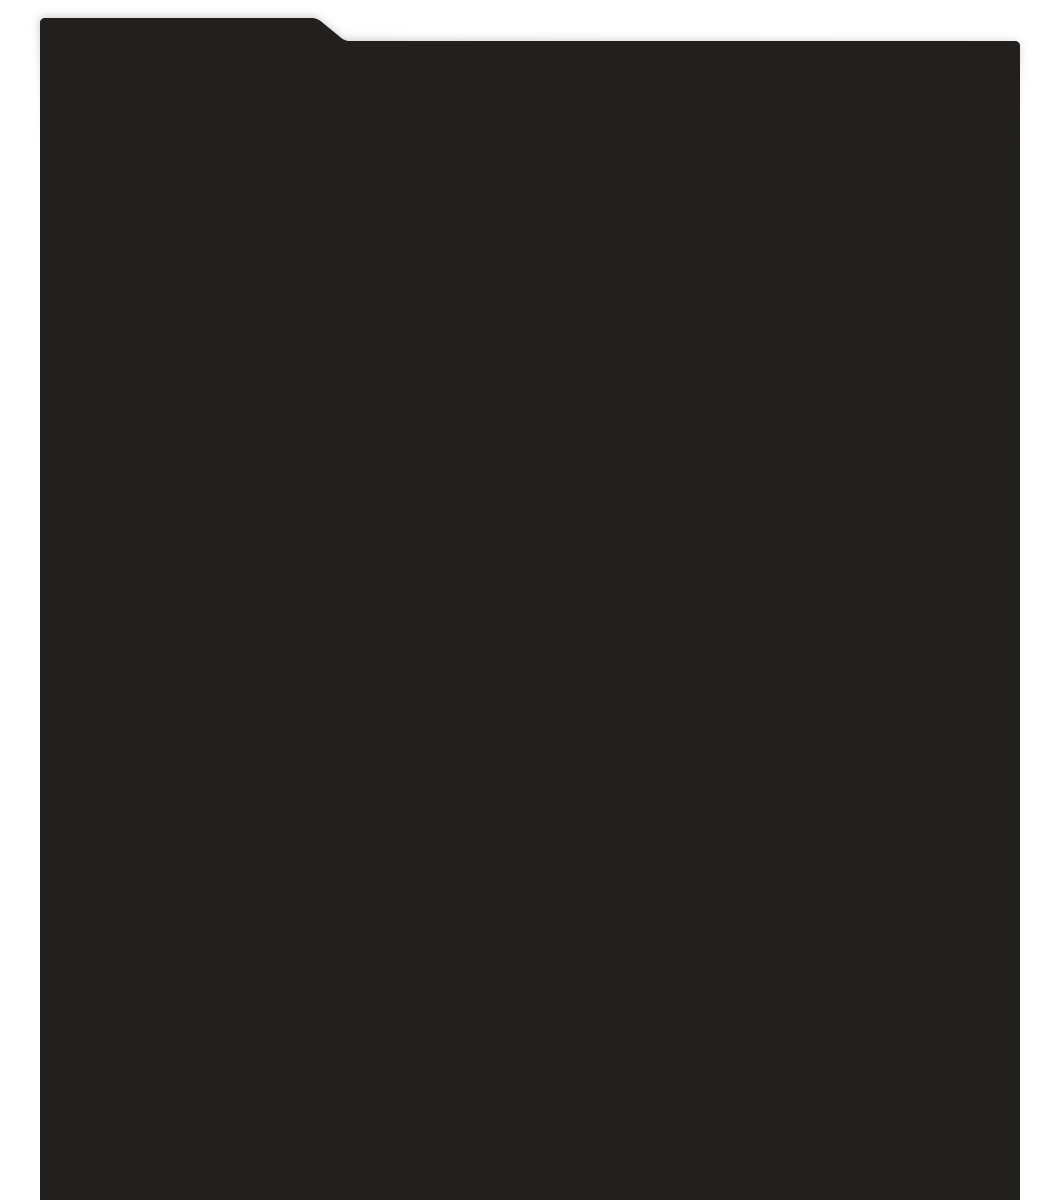
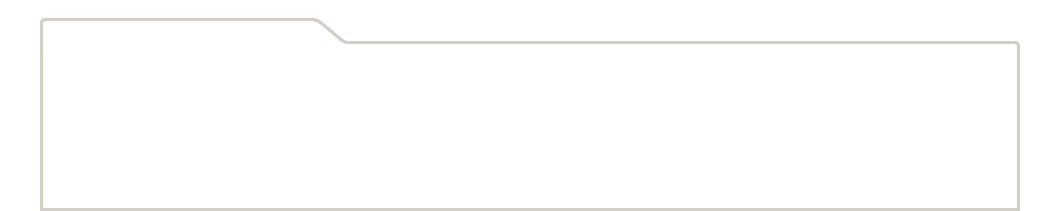
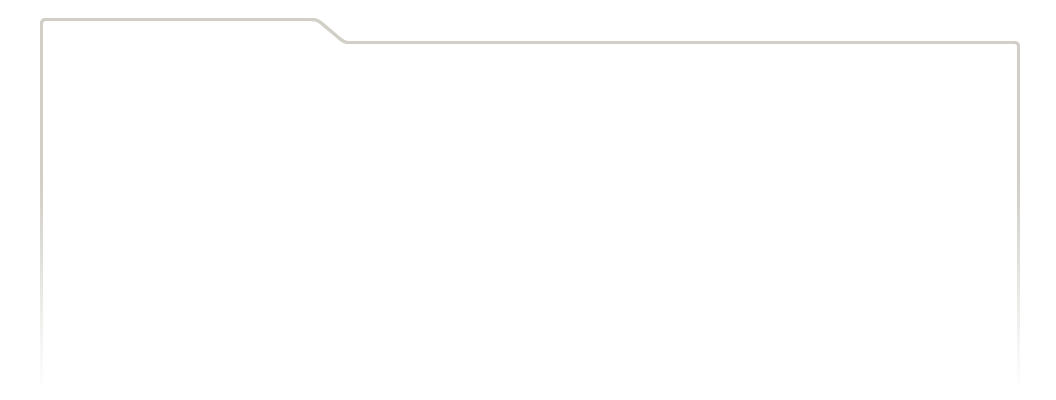
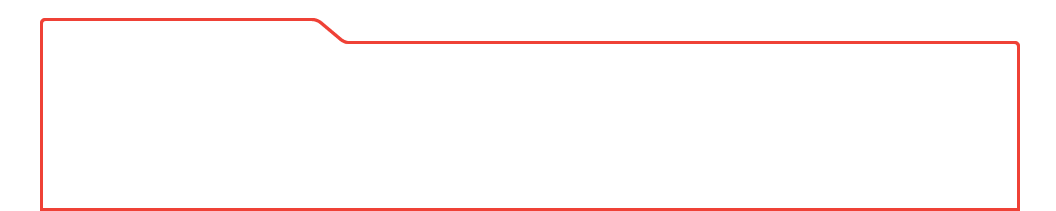
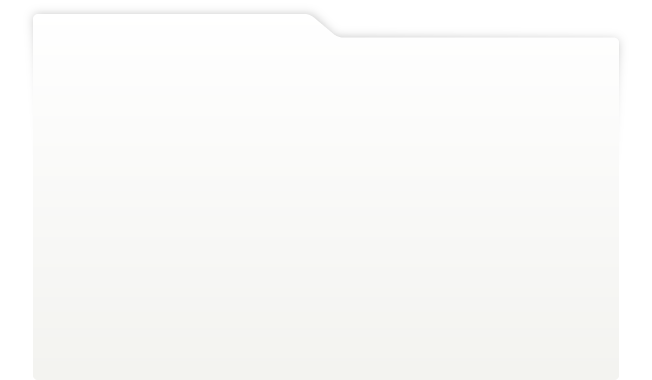
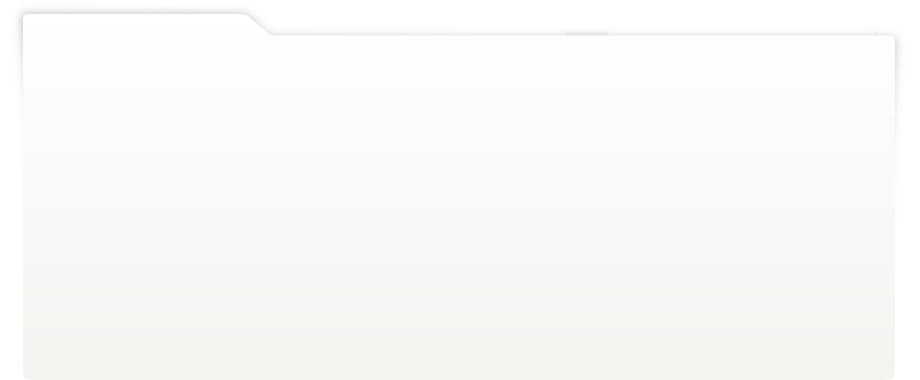
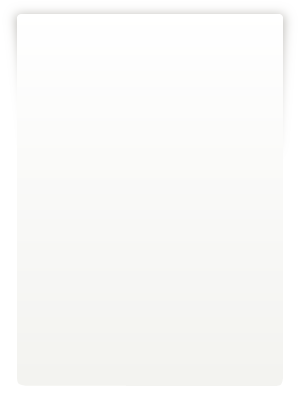
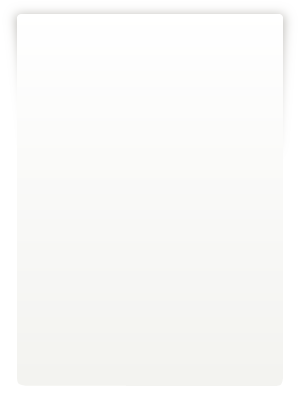
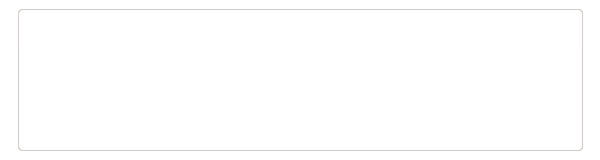
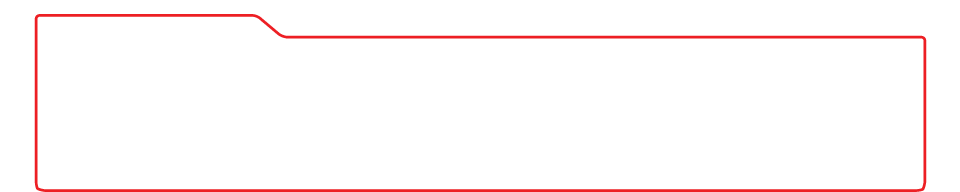
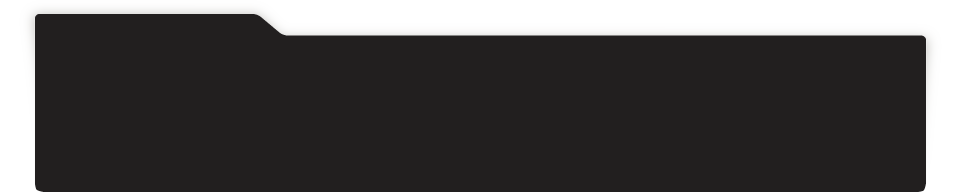
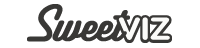
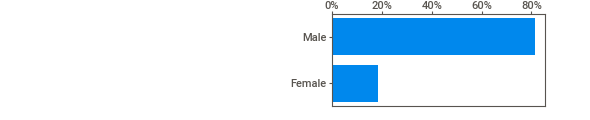
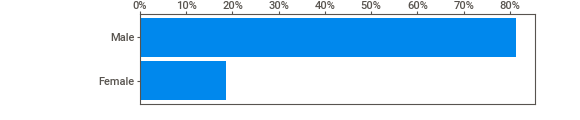
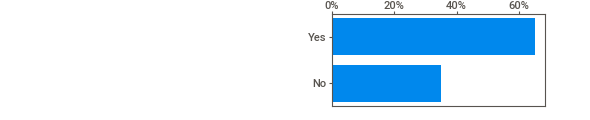
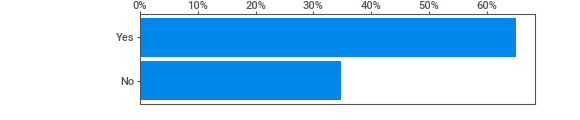
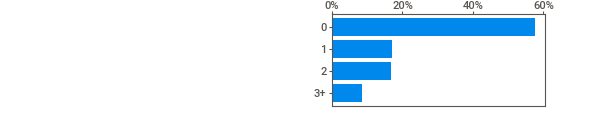
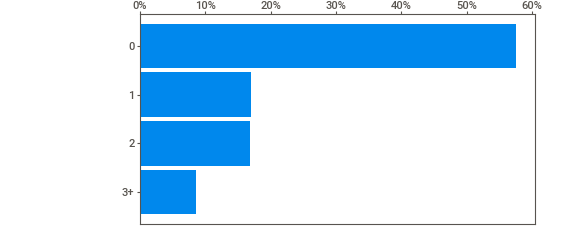
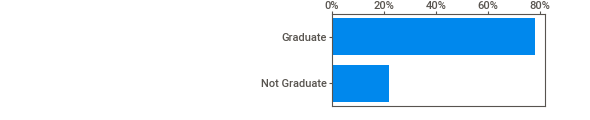
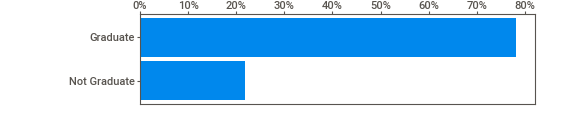
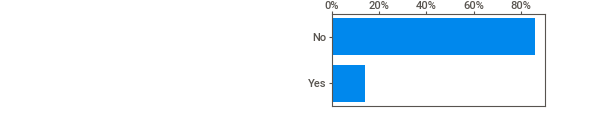
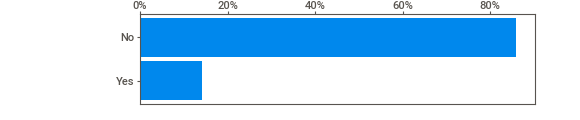
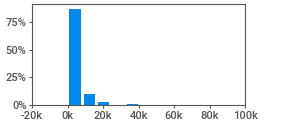
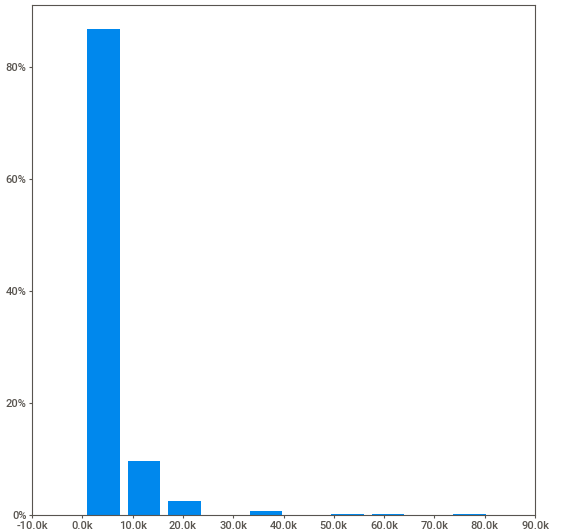
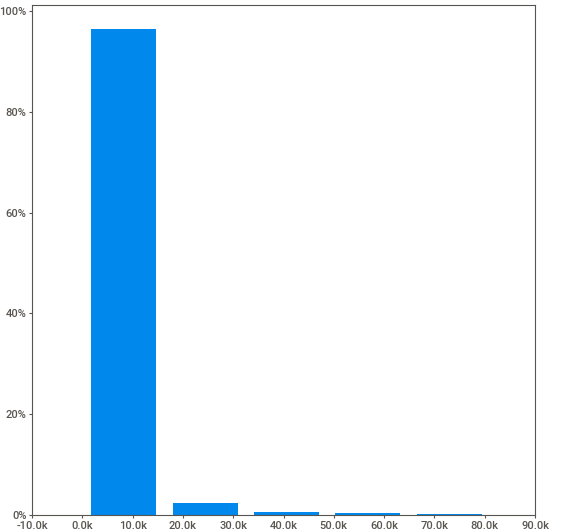
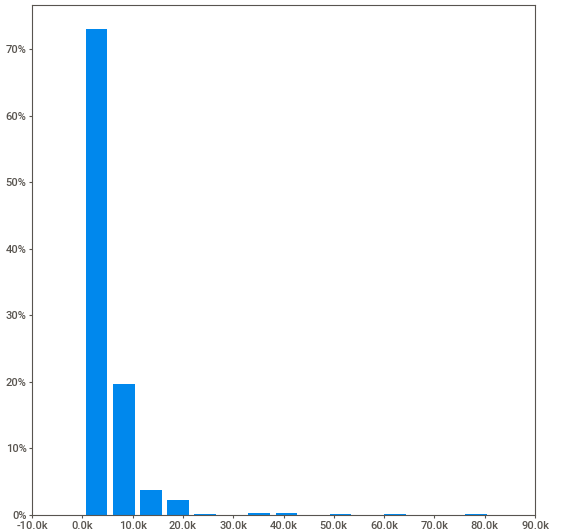
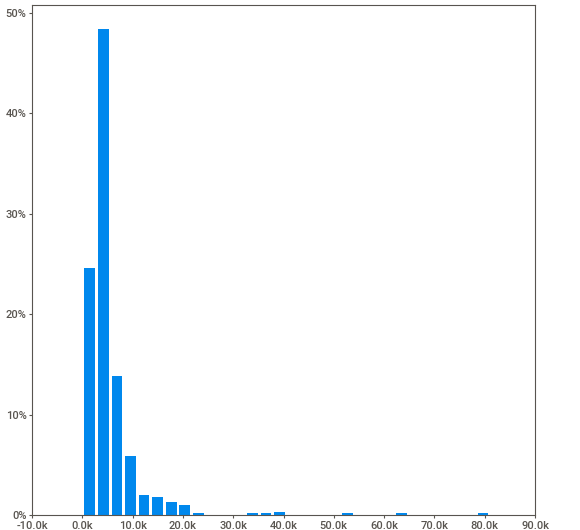
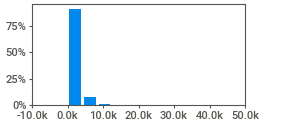
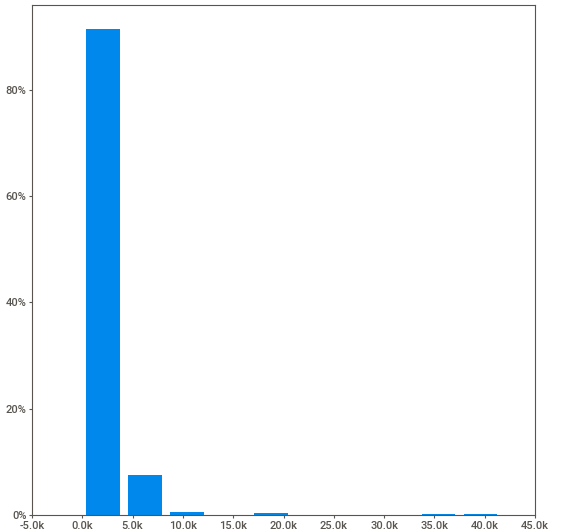
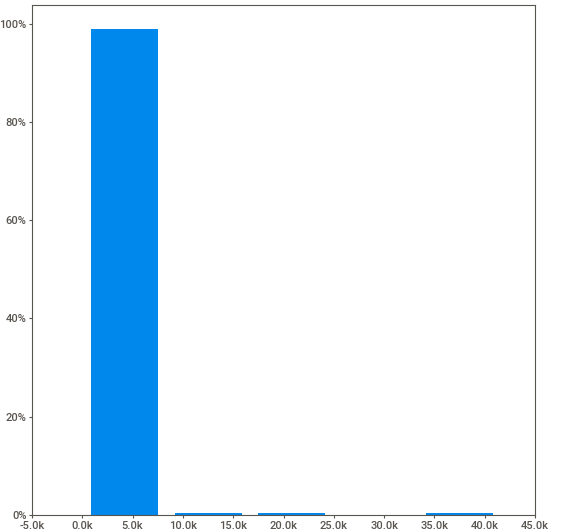
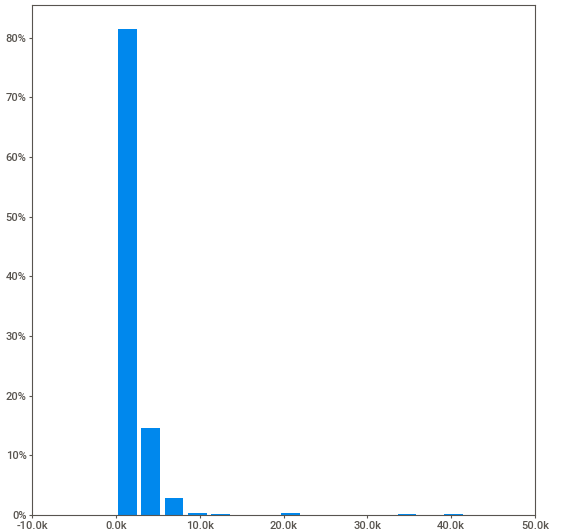
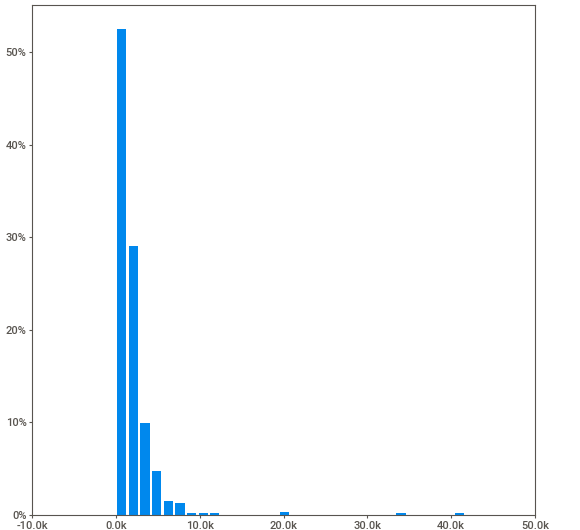
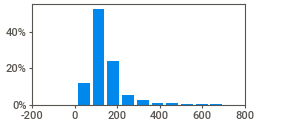
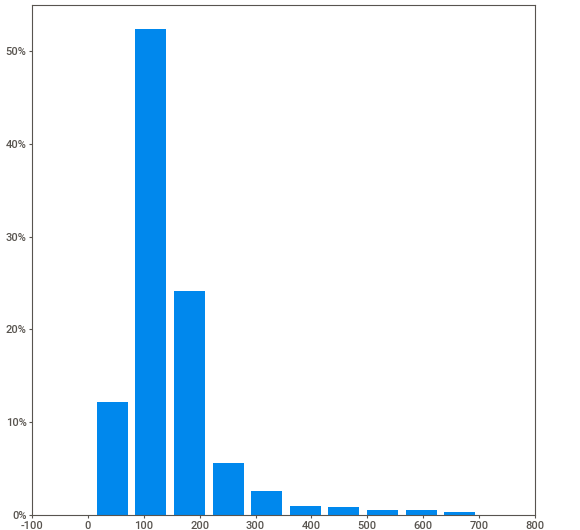
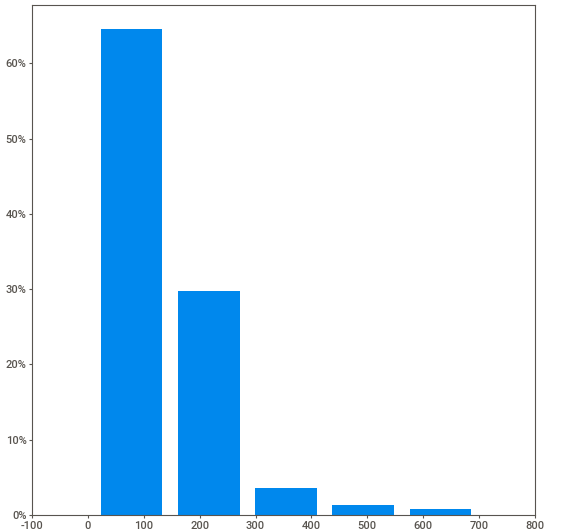
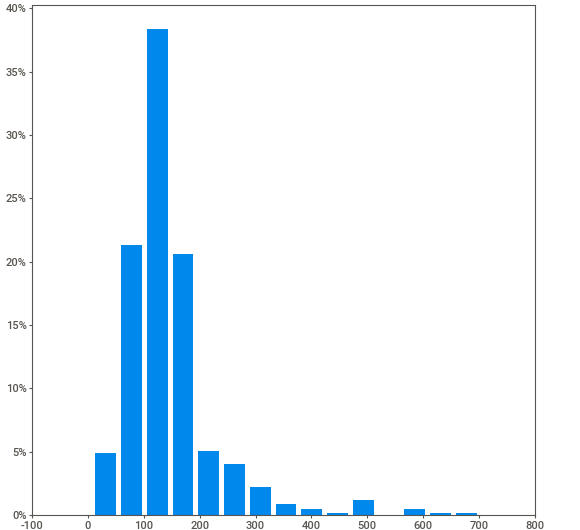
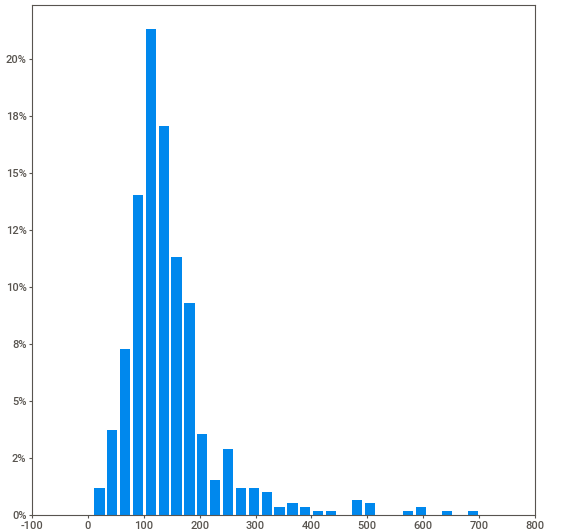
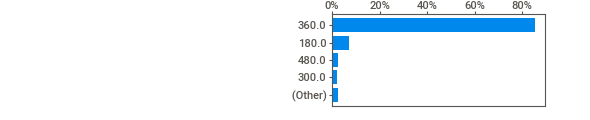
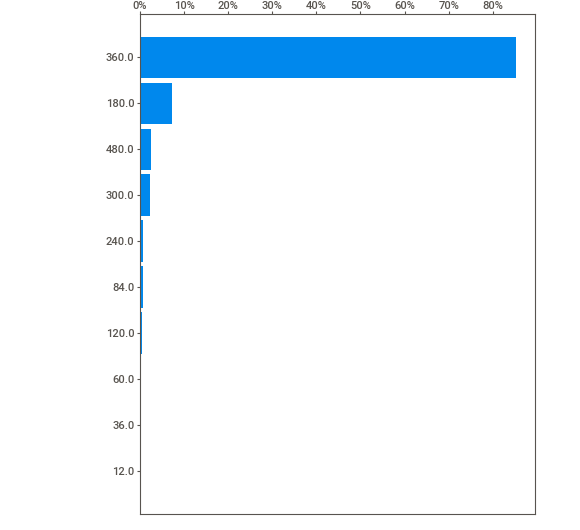
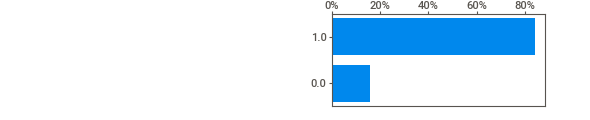
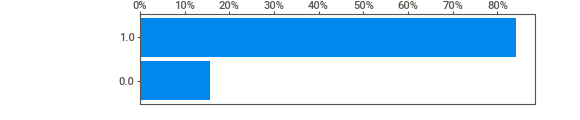
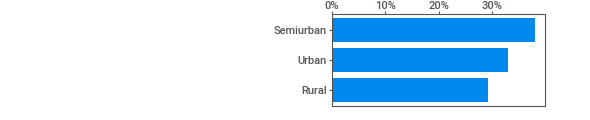
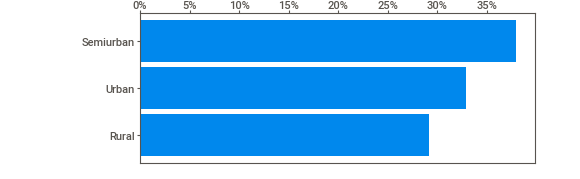
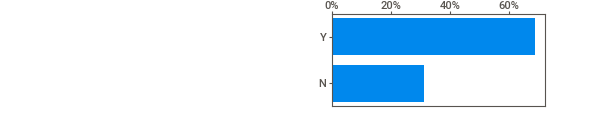
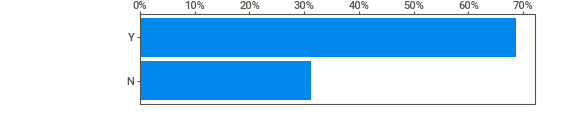
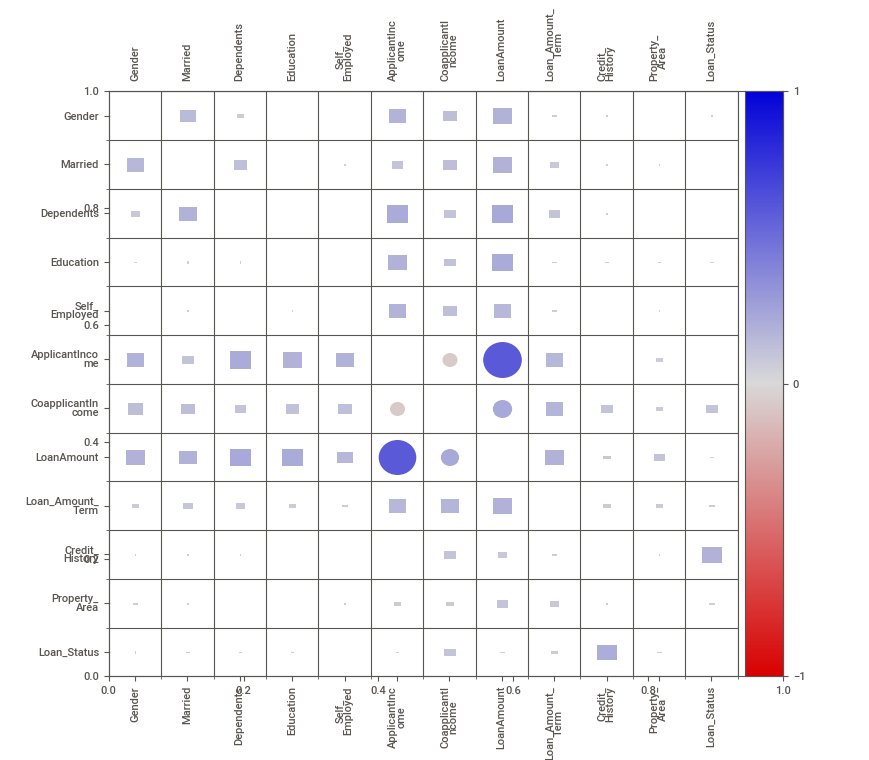
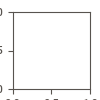

In [20]:
autoEDA = sweetviz.analyze(train)
autoEDA.show_notebook()

---------------------------------------------------------------------------------------------------------------------------------------------

## EDA 

### Question 1: An overview of the data. 
- Provide the number of records, fields and their data types

In [186]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


#### Summary:
- There are 614 rows in train dataset, with 13 fields and three data types: 8 objects, 1 int and 4 float. 
- The test dataset have 367 rows, with 12 field (no target variable: Loan_Status). There are 7 objest, 1 int and 4 float
- Credit_History should be object


In [182]:
train['Credit_History'] = train['Credit_History'].astype('object')

### Question 2: Data quality issues
- Missing values and duplicates)

In [13]:
train.duplicated().sum()

0

In [14]:
test.duplicated().sum()

0

In [15]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [49]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

#### Summary:
There are a no duplication but there are a few null, mostly located at credit_historuy and self_employed status

# Question 3. How do the the loan statuses compare? 
- Loan status distribution


In [124]:
loan_status = train['Loan_Status'].value_counts(normalize=True) ## normalize rerturn %
loan_status

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

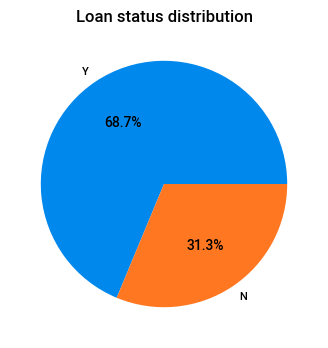

In [126]:
plt.figure(figsize = (4,4))
plt.pie(loan_status, labels=loan_status.index, autopct='%1.1f%%') #autopct give the % label of the chart
plt.title("Loan status distribution")
plt.show()

### Question 4:  How many of the loan applicants have dependents based on the historical dataset?

In [106]:
# shape[0] give the number of row in series
dependent = train[train['Dependents'] !='0'].shape[0]
percentage =  round(dependent/train.shape[0]*100,2)

269

In [115]:
print(f'There are {dependent}, accounted for {percentage}% of the total applicant')

There are 269, accounted for 43.81% of the total applicant


### Question 5. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset?

In [138]:
employ_df = train['Self_Employed'].value_counts()
employ_df

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

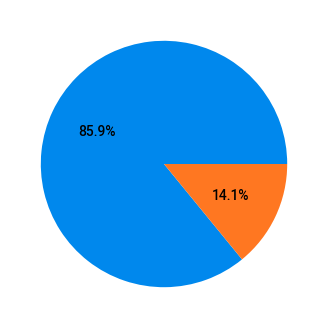

In [154]:
plt.figure(figsize = (4,4))
plt.pie(employ_df, autopct='%1.1f%%')
plt.show()

#### Summary: 
- 85% of the applocants are not self_employed

### Question 6. Are applicants with a credit history more likely to have the loan application proceeded ?

In [218]:
credit_default = train.groupby('Credit_History')['Loan_Status'].value_counts().unstack()
credit_default
# unstack(): Converts the Series to a DataFrame where each Loan_Status becomes a column, and Credit_History becomes the index.

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


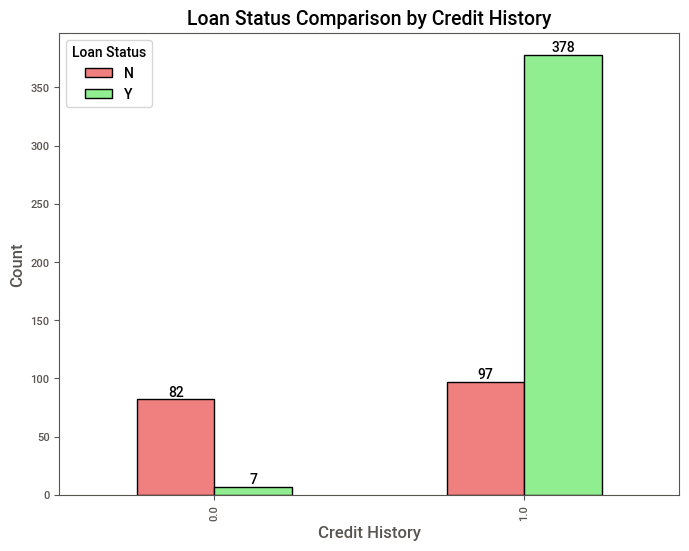

In [232]:
# Plot the data
ax = credit_default.plot(kind='bar', figsize=(8,6), color=['lightcoral', 'lightgreen'], edgecolor='black')

# Add labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

# Add labels and title
plt.xlabel('Credit History', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Loan Status Comparison by Credit History', fontsize=14)
plt.legend(title='Loan Status', fontsize=10)

# Display the plot
plt.show()


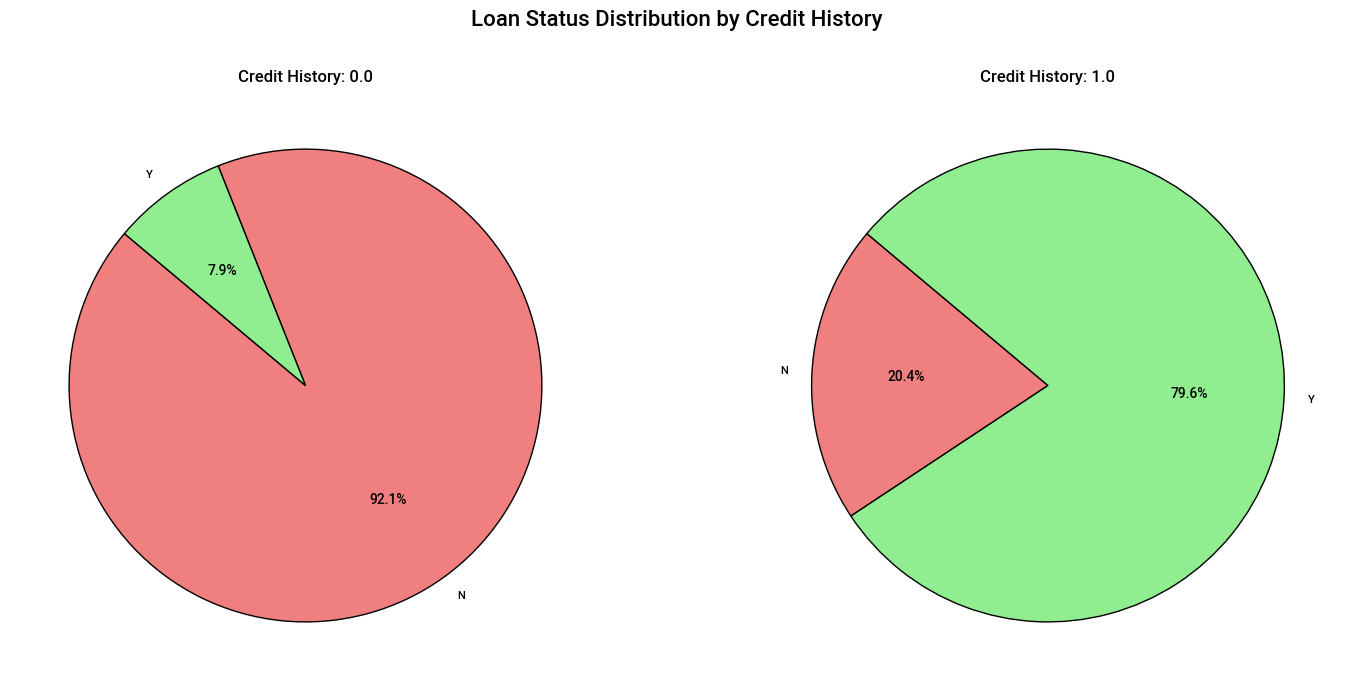

In [234]:
# Create subplots: plt.subplots(): Creates a grid of subplots. The number of columns is equal to the number of unique Credit_History values.
fig, axes = plt.subplots(nrows=1, ncols=len(credit_default), figsize=(15, 7))

# Plot pie charts
for ax, (credit_history, data) in zip(axes, credit_default.iterrows()):
    ax.pie(data, labels=data.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'],
           startangle=140, wedgeprops={'edgecolor': 'black'})
    ax.set_title(f'Credit History: {credit_history}')

# Add a main title
plt.suptitle('Loan Status Distribution by Credit History', fontsize=16)

# Display the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout to make room for the main title
plt.show()

### Conclusion:
- Yes, the credit history have great impact on the result of the application.
- The applicant have credit history is likely to have the loan application approved compared to the one with no history.

### Question 7. Is there a correlation between the applicant's income and the loan amount they applied for?

In [250]:
# Select only numeric columns
numeric_cols = train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]

# Calculate correlation matrix
correlation_matrix = numeric_cols.corr()
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878
LoanAmount,0.570909,0.188619,1.000000,0.039447
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000


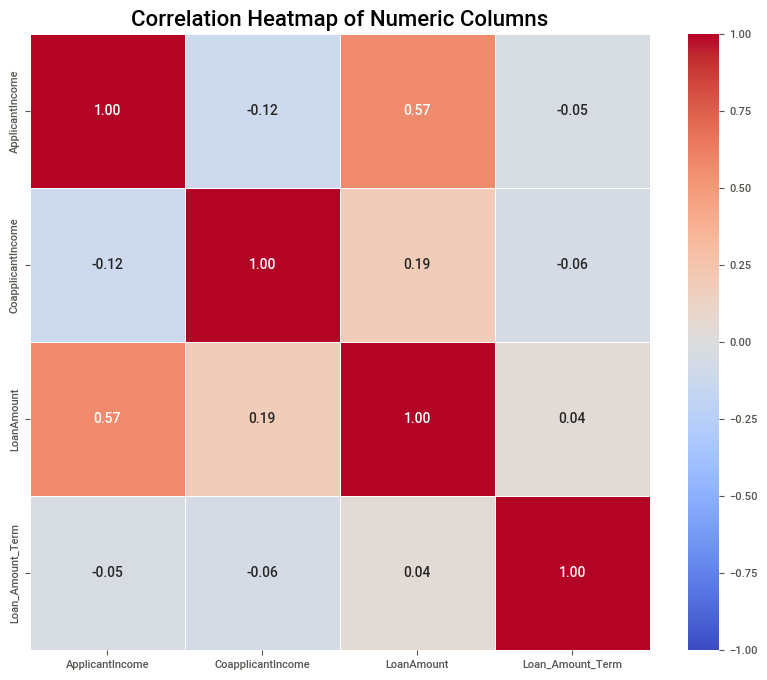

In [252]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Columns', fontsize=16)
plt.show()

### Summary:
- Loan_amount and ApplicantIncome have the highest correlation among the numerical attribute.
- Regardless, the two have somewhere between weak and moderate positve correlation.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Part Two: Machine learing

## Auto ML wth autosklearn


In [26]:
# Matrix of features

X = train[['Gender',
'Married',
'Dependents',
'Education',
'Self_Employed',
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Credit_History',
'Property_Area']]

# convert string(text) to categorical
X['Gender'] = X['Gender'].astype('category')
X['Married'] = X['Married'].astype('category')
X['Education'] = X['Education'].astype('category')
X['Dependents'] = X['Dependents'].astype('category')
X['Self_Employed'] = X['Self_Employed'].astype('category')
X['Property_Area'] = X['Property_Area'].astype('category')


# label encode target
y = train['Loan_Status'].map({'N':0,'Y':1}).astype(int)


# # train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [27]:
# train
autoML = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=2*30, per_run_time_limit=30, n_jobs=8) # imposing a 1 minute time limit on this
autoML.fit(X_train, y_train)

# predict
predictions_autoML = autoML.predict(X_test)

In [28]:
print('Model Accuracy:', accuracy_score(predictions_autoML, y_test))

Model Accuracy: 0.7886178861788617


In [29]:
print(confusion_matrix(predictions_autoML, y_test))

[[18  1]
 [25 79]]


## Bespoke ML with sklearn

### Data Preparation

In [30]:
# Matrix of features

df = train[['Gender',
'Married',
'Education',
'Self_Employed',
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Credit_History']]


# imputing the missing values:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

# encoding categorical features
df['Gender'] = df['Gender'].map({'Male':0,'Female':1}).astype(int)
df['Married'] = df['Married'].map({'No':0,'Yes':1}).astype(int)
df['Education'] = df['Education'].map({'Not Graduate':0,'Graduate':1}).astype(int)
df['Self_Employed'] = df['Self_Employed'].map({'No':0,'Yes':1}).astype(int)
df['Credit_History'] = df['Credit_History'].astype(int)


df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace = True)
 
X = df.copy()

# label encode target
y = train['Loan_Status'].map({'N':0,'Y':1}).astype(int)


# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [31]:
# some classifiers you can pick from (remember to import)
import sklearn
classifiers = sklearn.utils.all_estimators(type_filter=None)
for name, class_ in classifiers:
    if hasattr(class_, 'predict_proba'):
        print(name)

AdaBoostClassifier
BaggingClassifier
BayesianGaussianMixture
BernoulliNB
CalibratedClassifierCV
CategoricalNB
ClassifierChain
ComplementNB
DecisionTreeClassifier
DummyClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianMixture
GaussianNB
GaussianProcessClassifier
GradientBoostingClassifier
GridSearchCV
HalvingGridSearchCV
HalvingRandomSearchCV
HistGradientBoostingClassifier
KNeighborsClassifier
LabelPropagation
LabelSpreading
LinearDiscriminantAnalysis
LogisticRegression
LogisticRegressionCV
MLPClassifier
MultiOutputClassifier
MultinomialNB
NuSVC
OneVsRestClassifier
Pipeline
QuadraticDiscriminantAnalysis
RFE
RFECV
RadiusNeighborsClassifier
RandomForestClassifier
RandomizedSearchCV
SGDClassifier
SVC
SelfTrainingClassifier
StackingClassifier
VotingClassifier


In [32]:
# train
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier() #change model here
clf.fit(X_train, y_train)

# predict
predictions_clf = clf.predict(X_test)

In [33]:
print('Model Accuracy:', accuracy_score(predictions_clf, y_test))

Model Accuracy: 0.7723577235772358


In [34]:
print(confusion_matrix(predictions_clf, y_test))

[[18  3]
 [25 77]]
